### Step 1: Import Libraries

In [1]:
!pip install tensorflow

In [2]:
%tensorflow_version X.X
from numpy.random import seed
seed(2)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.17.0


### Step 2: Import Data

#### Text files to csv

In [ ]:
# prompt: read a text file

def read_text_file(file_path):
  """Reads a text file and returns its contents as a string.

  Args:
    file_path: The path to the text file.

  Returns:
    A string containing the file's contents.
  """
  try:
    with open('ticdata2000.txt', 'r', encoding='windows-1252') as f:
      content = f.read()
      return content
  except FileNotFoundError:
    print(f"File not found: {file_path}")
    return None


In [ ]:
# prompt: convert ticdata2000.txt to csv file

text_file_path = "ticdata2000.txt"  # Replace with your text file path
output_csv_path = "ticdata2000.csv"  # Replace with your desired output CSV path

text_file_to_csv(text_file_path, output_csv_path)


# prompt: downloadthe csv file

from google.colab import files
files.download('ticdata2000.csv')


In [ ]:
# prompt: convert ticeval2000.txt to csv file
text_file_path = "ticeval2000.txt"  # Replace with your text file path
output_csv_path = "ticeval2000.csv"  # Replace with your desired output CSV path

text_file_to_csv(text_file_path, output_csv_path)


# prompt: downloadthe csv file

from google.colab import files
files.download('ticeval2000.csv')


In [ ]:
# prompt: convert ticeval2000.txt to csv file
text_file_path = "tictgts2000.txt"  # Replace with your text file path
output_csv_path = "tictgts2000.csv"  # Replace with your desired output CSV path

text_file_to_csv(text_file_path, output_csv_path)


# prompt: downloadthe csv file

from google.colab import files
files.download('tictgts2000.csv')


In [ ]:
# prompt: create a dataframe with the two numbers in the start of each line as column 1 and the remaining content as column 2 from a text file

import pandas as pd
import re

def create_dataframe_from_text(file_path):
  """
  Creates a DataFrame from a text file with the first two numbers as column 1
  and the remaining content as column 2.

  Args:
      file_path: The path to the text file.

  Returns:
      A Pandas DataFrame with the extracted data.
  """
  c1 = []
  c2 = []
  #input_file = 'column names.txt'
  with open(file_path, 'r', encoding='windows-1252') as infile:
      for line in infile:
          # Use regex to match one or two numbers at the start of the line
          match = re.match(r'(\d+)(?:\s+(\d+))?\s+(.*)', line)
          if match:
              # Extract the first number
              col1 = match.group(1)
              # Check if the second number exists
              if match.group(2):
                  col1 += f" {match.group(2)}"  # Combine the two numbers if the second exists
              col2 = match.group(3).strip()   # Remaining content
              #data.append([col1, col2])
              #c1.append(col1)
              c2.append(col2)
  # df = pd.DataFrame({
  #   'Column1': c1,
  #   'Column2': c2
  # })
  return c2

# Example usage
file_path = 'column names.txt'  # Replace with your text file path
df_from_text = create_dataframe_from_text(file_path)
print(df_from_text)


#### Adding column names processing for csv files

In [ ]:
train_data = pd.read_csv('ticdata2000.csv')
test_data = pd.read_csv('ticeval2000.csv')
target_data = pd.read_csv('tictgts2000.csv')
new_column_names= ['MOSTYPE Customer Subtype ', 'MAANTHUI Number of houses', 'MGEMOMV Avg size household', 'MGEMLEEF Avg age ', 'MOSHOOFD Customer main type', 'MGODRK Roman catholic ', 'MGODPR Protestant ', 'MGODOV Other religion', 'MGODGE No religion', 'MRELGE Married', 'MRELSA Living together', 'MRELOV Other relation', 'MFALLEEN Singles', 'MFGEKIND Household without children', 'MFWEKIND Household with children', 'MOPLHOOG High level education', 'MOPLMIDD Medium level education', 'MOPLLAAG Lower level education', 'MBERHOOG High status', 'MBERZELF Entrepreneur', 'MBERBOER Farmer', 'MBERMIDD Middle management', 'MBERARBG Skilled labourers', 'MBERARBO Unskilled labourers', 'MSKA Social class A', 'MSKB1 Social class B1', 'MSKB2 Social class B2', 'MSKC Social class C', 'MSKD Social class D', 'MHHUUR Rented house', 'MHKOOP Home owners', 'MAUT1 1 car', 'MAUT2 2 cars', 'MAUT0 No car', 'MZFONDS National Health Service', 'MZPART Private health insurance', 'MINKM30 Income < 30.000', 'MINK3045 Income 30-45.000', 'MINK4575 Income 45-75.000', 'MINK7512 Income 75-122.000', 'MINK123M Income >123.000', 'MINKGEM Average income', 'MKOOPKLA Purchasing power class', 'PWAPART Contribution private third party insurance see L4', 'PWABEDR Contribution third party insurance (firms) ...', 'PWALAND Contribution third party insurance (agriculture)', 'PPERSAUT Contribution car policies', 'PBESAUT Contribution delivery van policies', 'PMOTSCO Contribution motorcycle/scooter policies', 'PVRAAUT Contribution lorry policies', 'PAANHANG Contribution trailer policies', 'PTRACTOR Contribution tractor policies', 'PWERKT Contribution agricultural machines policies', 'PBROM Contribution moped policies', 'PLEVEN Contribution life insurances', 'PPERSONG Contribution private accident insurance policies', 'PGEZONG Contribution family accidents insurance policies', 'PWAOREG Contribution disability insurance policies', 'PBRAND Contribution fire policies', 'PZEILPL Contribution surfboard policies', 'PPLEZIER Contribution boat policies', 'PFIETS Contribution bicycle policies', 'PINBOED Contribution property insurance policies', 'PBYSTAND Contribution social security insurance policies', 'AWAPART Number of private third party insurance 1 - 12', 'AWABEDR Number of third party insurance (firms) ...', 'AWALAND Number of third party insurance (agriculture)', 'APERSAUT Number of car policies', 'ABESAUT Number of delivery van policies', 'AMOTSCO Number of motorcycle/scooter policies', 'AVRAAUT Number of lorry policies', 'AAANHANG Number of trailer policies', 'ATRACTOR Number of tractor policies', 'AWERKT Number of agricultural machines policies', 'ABROM Number of moped policies', 'ALEVEN Number of life insurances', 'APERSONG Number of private accident insurance policies', 'AGEZONG Number of family accidents insurance policies', 'AWAOREG Number of disability insurance policies', 'ABRAND Number of fire policies', 'AZEILPL Number of surfboard policies', 'APLEZIER Number of boat policies', 'AFIETS Number of bicycle policies', 'AINBOED Number of property insurance policies', 'ABYSTAND Number of social security insurance policies', 'CARAVAN Number of mobile home policies 0 - 1']

In [ ]:
len(train_data.columns[0:85])

In [ ]:
# Rename the train_data columns with values from df_from_text
if len(new_column_names) == len(train_data.columns):
    train_data.columns = new_column_names
else:
    print(f"Length mismatch: df_from_text has {len(new_column_names)} values, while df has {len(train_data.columns)} columns.")

# Display the updated DataFrame and its new column names
print("Updated DataFrame:")
print(train_data.head())
print("New column names:", train_data.columns.tolist())


In [ ]:
# Rename the train_data columns with values from df_from_text
new_test_column_names = new_column_names[0:85]
if len(new_test_column_names) == len(test_data.columns):
    test_data.columns = new_test_column_names
else:
    print(f"Length mismatch: df_from_text has {len(new_test_column_names)} values, while df has {len(test_data.columns)} columns.")

# Display the updated DataFrame and its new column names
print("Updated DataFrame:")
print(test_data)
print("New column names:", test_data.columns.tolist())


In [ ]:
# Rename the train_data columns with values from df_from_text
new_target_column_name = new_column_names[85:]
if len(new_target_column_name) == len(target_data.columns):
    target_data.columns = new_target_column_name
else:
    print(f"Length mismatch: df_from_text has {len(new_target_column_name)} values, while df has {len(target_data.columns)} columns.")

# Display the updated DataFrame and its new column names
print("Updated DataFrame:")
print(target_data)
print("New column names:", target_data.columns.tolist())


In [ ]:
# prompt: download test_data and testdata.csv

from google.colab import files

test_data.to_csv('test_data.csv', index=False)
files.download('test_data.csv')

train_data.to_csv('train_data.csv', index=False)
files.download('train_data.csv')

target_data.to_csv('target_data.csv', index=False)
files.download('target_data.csv')


####Merging test data and test target features

In [4]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')
target_df = pd.read_csv('target_data.csv')

In [ ]:
train_df.head()

,MOSTYPE Customer Subtype,MAANTHUI Number of houses,MGEMOMV Avg size household,MGEMLEEF Avg age,MOSHOOFD Customer main type,MGODRK Roman catholic,MGODPR Protestant,MGODOV Other religion,MGODGE No religion,MRELGE Married,...,APERSONG Number of private accident insurance policies,AGEZONG Number of family accidents insurance policies,AWAOREG Number of disability insurance policies,ABRAND Number of fire policies,AZEILPL Number of surfboard policies,APLEZIER Number of boat policies,AFIETS Number of bicycle policies,AINBOED Number of property insurance policies,ABYSTAND Number of social security insurance policies,CARAVAN Number of mobile home policies 0 - 1
0,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
2,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
3,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
4,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# prompt: insert a new column namely CARAVAN Number of mobile home policies 0 - 1 at the end in test_df and add values from test_df['CARAVAN Number of mobile home policies 0 - 1']

# Insert a new column at the end of test_df
test_df.insert(len(test_df.columns), 'CARAVAN Number of mobile home policies 0 - 1', target_df['CARAVAN Number of mobile home policies 0 - 1'])
test_df.columns

Index(['MOSTYPE Customer Subtype ', 'MAANTHUI Number of houses',
       'MGEMOMV Avg size household', 'MGEMLEEF Avg age ',
       'MOSHOOFD Customer main type', 'MGODRK Roman catholic ',
       'MGODPR Protestant ', 'MGODOV Other religion', 'MGODGE No religion',
       'MRELGE Married', 'MRELSA Living together', 'MRELOV Other relation',
       'MFALLEEN Singles', 'MFGEKIND Household without children',
       'MFWEKIND Household with children', 'MOPLHOOG High level education',
       'MOPLMIDD Medium level education', 'MOPLLAAG Lower level education',
       'MBERHOOG High status', 'MBERZELF Entrepreneur', 'MBERBOER Farmer',
       'MBERMIDD Middle management', 'MBERARBG Skilled labourers',
       'MBERARBO Unskilled labourers', 'MSKA Social class A',
       'MSKB1 Social class B1', 'MSKB2 Social class B2', 'MSKC Social class C',
       'MSKD Social class D', 'MHHUUR Rented house', 'MHKOOP Home owners',
       'MAUT1 1 car', 'MAUT2 2 cars', 'MAUT0 No car',
       'MZFONDS National Healt

In [ ]:
# Print the columns with missing values in train_df
print(train_df.columns[train_df.isnull().any()])


Index([], dtype='object')


In [ ]:
# Print the columns with missing values in train_df
print(test_df.columns[train_df.isnull().any()])


Index([], dtype='object')


In [ ]:
# prompt: check columns in train_df where uniques values are 2 and get the column number and those unique values
print("Columns with binary values:", "\n")
for column in train_df.columns:
  unique_values = train_df[column].unique()
  if len(unique_values) == 2:
    print(f"Column: {column}, Column Number: {train_df.columns.get_loc(column)}, Unique Values: {unique_values}")


Columns with binary values: 

Column: PFIETS Contribution bicycle policies, Column Number: 61, Unique Values: [0 1]
Column: AWALAND Number of third party insurance (agriculture), Column Number: 66, Unique Values: [0 1]
Column: APERSONG Number of private accident insurance policies, Column Number: 76, Unique Values: [0 1]
Column: AGEZONG Number of family accidents insurance policies, Column Number: 77, Unique Values: [0 1]
Column: AZEILPL Number of surfboard policies, Column Number: 80, Unique Values: [0 1]
Column: CARAVAN Number of mobile home policies 0 - 1, Column Number: 85, Unique Values: [0 1]


In [ ]:

no_cols = [0, 1, 5, 61, 66, 76, 77, 80, 85]
columns = [i for i in range(len(train_df.columns)) if i not in no_cols]
print(columns)

numeric_columns = [train_df.columns[i] for i in columns]


[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 79, 81, 82, 83, 84]


In [ ]:
train_df[numeric_columns].columns

Index(['MGEMOMV Avg size household', 'MGEMLEEF Avg age ',
       'MOSHOOFD Customer main type', 'MGODPR Protestant ',
       'MGODOV Other religion', 'MGODGE No religion', 'MRELGE Married',
       'MRELSA Living together', 'MRELOV Other relation', 'MFALLEEN Singles',
       'MFGEKIND Household without children',
       'MFWEKIND Household with children', 'MOPLHOOG High level education',
       'MOPLMIDD Medium level education', 'MOPLLAAG Lower level education',
       'MBERHOOG High status', 'MBERZELF Entrepreneur', 'MBERBOER Farmer',
       'MBERMIDD Middle management', 'MBERARBG Skilled labourers',
       'MBERARBO Unskilled labourers', 'MSKA Social class A',
       'MSKB1 Social class B1', 'MSKB2 Social class B2', 'MSKC Social class C',
       'MSKD Social class D', 'MHHUUR Rented house', 'MHKOOP Home owners',
       'MAUT1 1 car', 'MAUT2 2 cars', 'MAUT0 No car',
       'MZFONDS National Health Service', 'MZPART Private health insurance',
       'MINKM30 Income < 30.000', 'MINK3045 

In [6]:
# prompt: columns with negative values

for column in train_df.columns:
  if (train_df[column] < 0).any():
    print(f"Column '{column}' contains negative values.")


####Visualise distributions

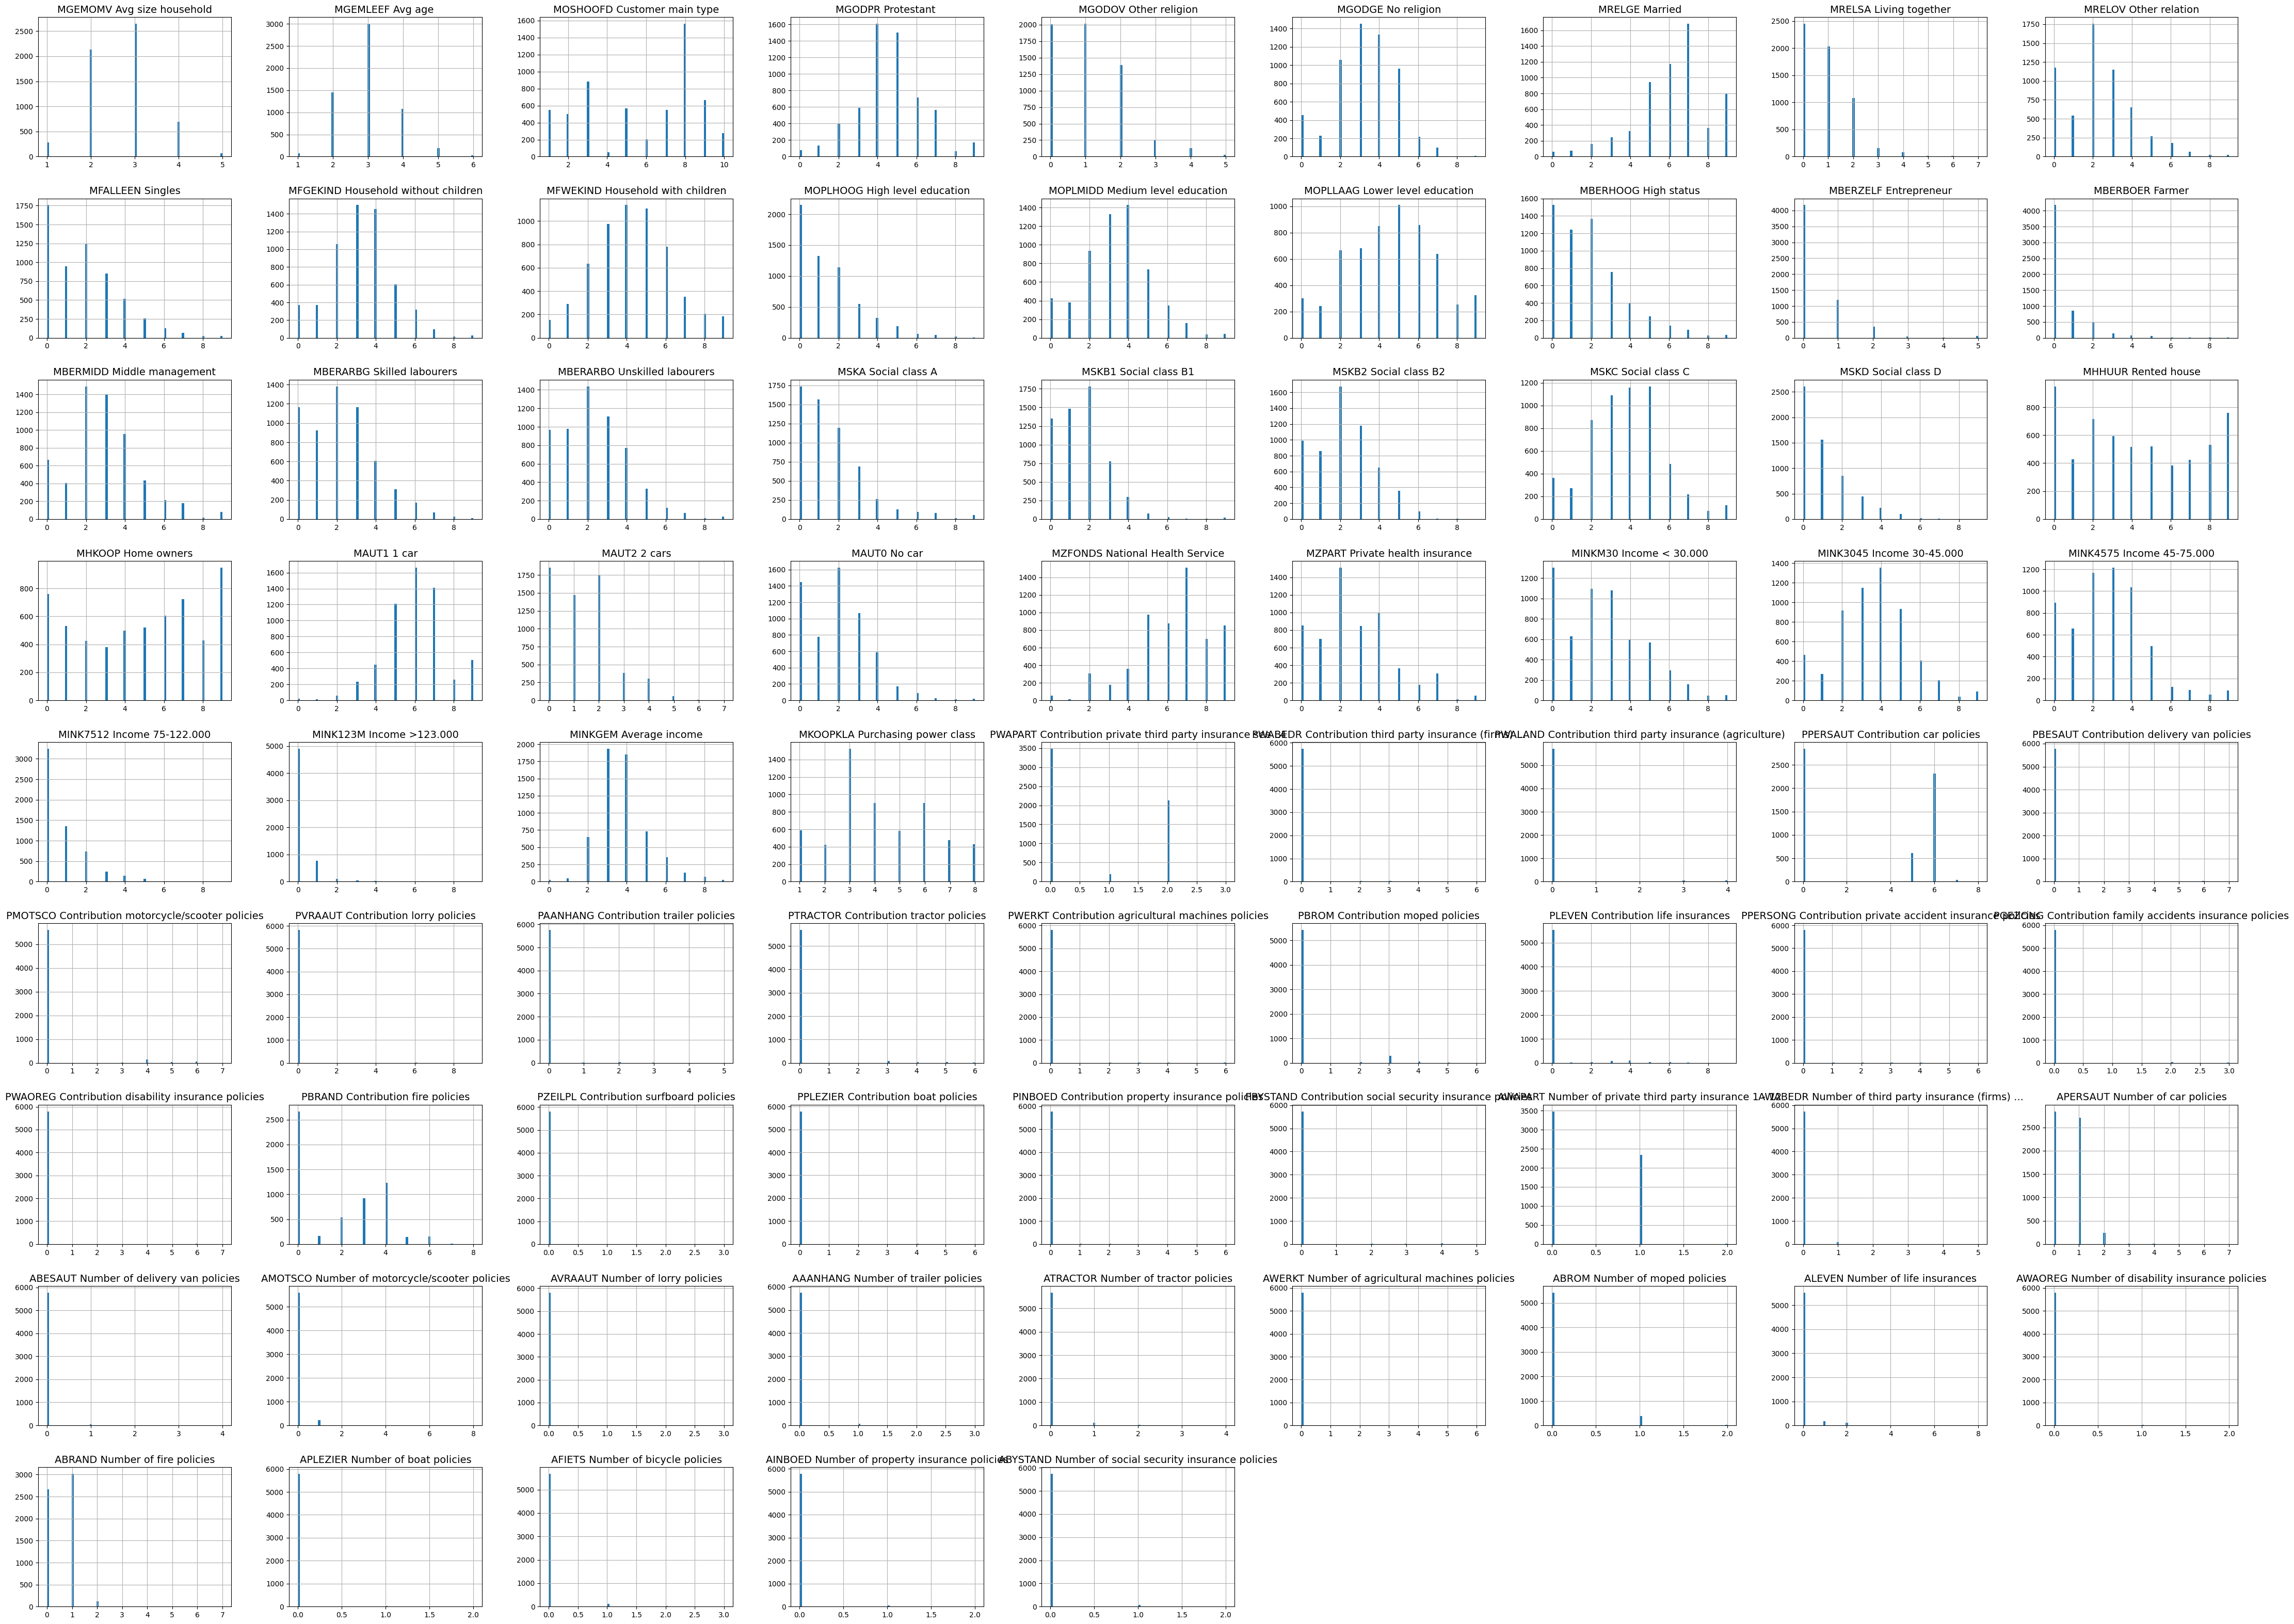

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train_df[numeric_columns].hist(bins=78, figsize=(55, 40))

plt.show()

### Step 3: Data *Preprocessing*

Categorical: Target Encoding: 'Category'

### Numerical Data Preprocessing


* log transformation: ['MGODOV Other religion', 'MRELSA Living together', 'MFALLEEN Singles', 'MOPLHOOG High level education', 'MBERHOOG High status', 'MBERZELF Entrepreneur', 'MSKA Social class A', 'MSKD Social class D', 'MAUT2 2 cars', 'MAUT0 No car', 'MINKM30 Income < 30.000', 'MINK7512 Income 75-122.000', 'MINK123M Income >123.000']


* Quantile transformation:
['MOSHOOFD Customer main type', 'MGODGE No religion', 'MRELGE Married', 'MRELOV Other relation', 'MFGEKIND Household without children', 'MOPLMIDD Medium level education', 'MOPLLAAG Lower level education', 'MBERMIDD Middle management', 'MBERARBG Skilled labourers', 'MBERARBO Unskilled labourers', 'MSKB1 Social class B1', 'MSKB2 Social class B2', 'MSKC Social class C', 'MHHUUR Rented house', 'MHKOOP Home owners', 'MAUT1 1 car', 'MZFONDS National Health Service', 'MZPART Private health insurance', 'MINK3045 Income 30-45.000', 'MINK4575 Income 45-75.000', 'MINKGEM Average income', 'MKOOPKLA Purchasing power class', 'PWAPART Contribution private third party insurance see L4']



####Pipelines and transformers

In [3]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [7]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.6 MB/s eta 0:00:00


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer, OneHotEncoder,  QuantileTransformer, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error


**Train/Validation Split**

In [9]:
from sklearn.model_selection import train_test_split

# Features are all columns except 'Target'
X_train = train_df.drop('CARAVAN Number of mobile home policies 0 - 1', axis=1)
X_test = test_df.drop('CARAVAN Number of mobile home policies 0 - 1', axis=1)

# Target variable is 'Target'
y_train = train_df['CARAVAN Number of mobile home policies 0 - 1']
y_test = test_df['CARAVAN Number of mobile home policies 0 - 1']

# Print shapes to verify the split
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (5821, 85)
X_test shape: (3999, 85)
y_train shape: (5821,)
y_test shape: (3999,)


In [10]:
#spac_attribs = ["Category"]
quant_attribs = ['MOSHOOFD Customer main type', 'MGODGE No religion', 'MRELGE Married', 'MRELOV Other relation',
                 'MFGEKIND Household without children', 'MOPLMIDD Medium level education', 'MOPLLAAG Lower level education',
                 'MBERMIDD Middle management', 'MBERARBG Skilled labourers', 'MBERARBO Unskilled labourers', 'MSKB1 Social class B1',
                 'MSKB2 Social class B2', 'MSKC Social class C', 'MHHUUR Rented house', 'MHKOOP Home owners', 'MAUT1 1 car',
                 'MZFONDS National Health Service', 'MZPART Private health insurance', 'MINK3045 Income 30-45.000',
                 'MINK4575 Income 45-75.000', 'MINKGEM Average income', 'MKOOPKLA Purchasing power class',
                 'PWAPART Contribution private third party insurance see L4']
log_attribs = ['MGODOV Other religion', 'MRELSA Living together', 'MFALLEEN Singles', 'MOPLHOOG High level education',
               'MBERHOOG High status', 'MBERZELF Entrepreneur', 'MSKA Social class A', 'MSKD Social class D', 'MAUT2 2 cars',
               'MAUT0 No car', 'MINKM30 Income < 30.000', 'MINK7512 Income 75-122.000', 'MINK123M Income >123.000']


#Pipelines
log_pipeline = Pipeline([("impute", KNNImputer(n_neighbors=3)),
                         ("log transform", PowerTransformer(method = 'box-cox'))])
quantile_pipeline = Pipeline([("impute", KNNImputer(n_neighbors=3)),
                              ("quantile transformer", QuantileTransformer(n_quantiles=100)),
                              ("standard scaling", StandardScaler())])


In [11]:
# prompt: assign all other attributes not in log_attribs to spac_attribs
spac_attribs = [attrib for attrib in X_train.columns if attrib not in quant_attribs]


In [12]:
preprocessing = ColumnTransformer([
                    ("spatial", "passthrough", spac_attribs),
                    ("quant", quantile_pipeline, quant_attribs),
                   # ("log", log_pipeline, log_attribs)
                ])

### Step 4: Build Model



####Basic functions

In [13]:
#fitting after train-test splitting
def pipelines_fitting(X_train, y_train, preprocessing):
    X_train_processed = preprocessing.fit_transform(X_train, y_train)
    X_df = pd.DataFrame(
        X_train_processed,
        columns=preprocessing.get_feature_names_out(),
        index=X_train.index)
    return X_df


In [14]:
#Evaluating model pipeline with Linear regression
def evaluate_model(model_pipeline, X, y):
    from sklearn.metrics import mean_absolute_error
    y_pred = model_pipeline.predict(X)
    model_mae = mean_absolute_error(y, y_pred)
    return(model_mae)



In [15]:
# Preprocess data
import sklearn
X_train_prep = preprocessing.fit_transform(X_train)
X_test_prep = preprocessing.fit_transform(X_test)


In [16]:
# Create a dataframe from the preprocessed data
X_train_prep = pd.DataFrame(X_train_prep, columns=preprocessing.get_feature_names_out())
X_test_prep = pd.DataFrame(X_test_prep, columns=preprocessing.get_feature_names_out())

**Build Model**

In [17]:

baseline_model = keras.Sequential([
    keras.layers.Dense(85, activation='relu', input_shape=(X_train_prep.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')  # Softmax for one-hot encoded labels
])

# Compile the model with categorical_crossentropy (for one-hot) and MSE as the metric
baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change to binary_crossentropy if single output

# Display the model's architecture
baseline_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 85)                  │           7,310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              86 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,396 (28.89 KB)

 Trainable params: 7,396 (28.89 KB)

 Non-trainable params: 0 (0.00 B)

**Fit Model**

In [18]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200
b_history = baseline_model.fit(X_train_prep, y_train, epochs=EPOCHS,
                    validation_data= (X_test_prep, y_test), verbose=0,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = baseline_model.evaluate(X_test_prep, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9362 - loss: 0.6838
Test Accuracy: 0.93


In [30]:
# Regularized model

baseline_model = keras.Sequential()
baseline_model.add(keras.layers.Dense(85, activation=tf.nn.relu,
                       input_shape=(X_train_prep.shape[1],))),
baseline_model.add(keras.layers.Dense(64, activation=tf.nn.relu,)),
baseline_model.add(keras.layers.Dense(32, activation=tf.nn.relu,)),
baseline_model.add(keras.layers.Dense(32, activation=tf.nn.relu,)),

baseline_model.add(keras.layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop() # Gradient Descent algorithm
optimizer = tf.keras.optimizers.Adam()

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
baseline_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 85)                  │           7,310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           5,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,983 (62.43 KB)

 Trainable params: 15,983 (62.43 KB)

 Non-trainable params: 0 (0.00 B)

**Fit Model**

In [31]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

class TrackValidationLoss(keras.callbacks.Callback):
    def __init__(self):
        super(TrackValidationLoss, self).__init__()
        self.lowest_val_loss = np.inf  # Start with infinity

    def on_epoch_end(self, epoch, logs):
        current_val_loss = logs.get('val_loss')
        if current_val_loss < self.lowest_val_loss:
            self.lowest_val_loss = current_val_loss
            print(f'\nLowest validation loss updated: {self.lowest_val_loss:.4f}')

# Create an instance of the custom callback
track_val_loss = TrackValidationLoss()

EPOCHS = 200
b_history = baseline_model.fit(X_train_prep, y_train, epochs=EPOCHS,
                    validation_data= (X_test_prep, y_test), verbose=0,
                    callbacks=[PrintDot(), track_val_loss])



.
Lowest validation loss updated: 0.2226
.
Lowest validation loss updated: 0.2099
..................................................................................................
....................................................................................................

In [32]:
# Evaluate the model on the test set
test_loss, test_accuracy = baseline_model.evaluate(X_test_prep, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9165 - loss: 1.4368
Test Accuracy: 0.91


**Lowest Validation Error**

In [33]:
# Print the lowest validation error
lowest_validation_error = min(b_history.history['val_loss'])
print(f'Lowest Validation Error: {lowest_validation_error:.4f}')

Lowest Validation Error: 0.2099


### Step 5: Plot Results

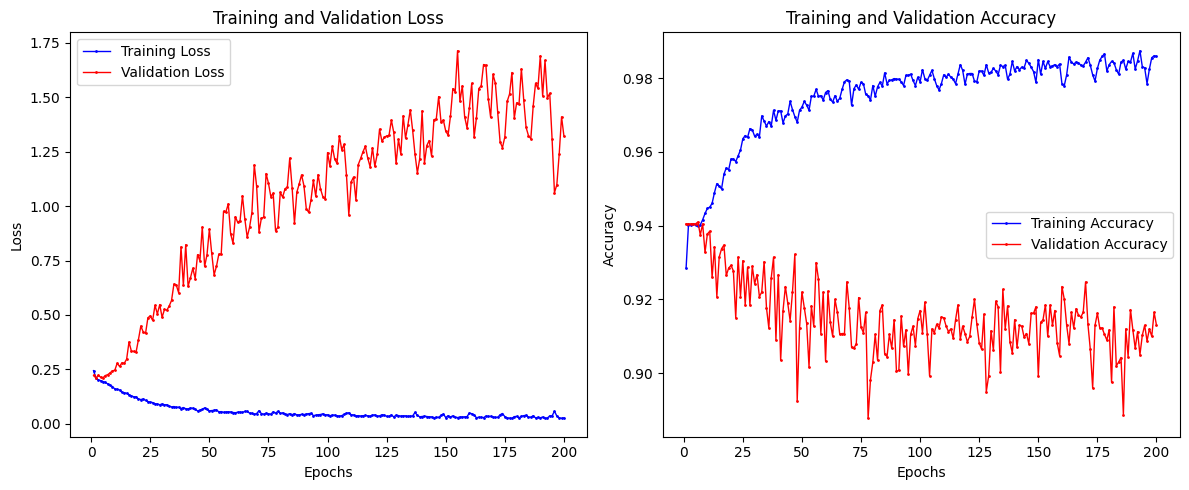

In [34]:
# Plotting results
train_loss = b_history.history['loss']
val_loss = b_history.history['val_loss']
train_accuracy = b_history.history['accuracy']
val_accuracy = b_history.history['val_accuracy']

# Set the number of epochs for x-axis
epochs_range = range(1, EPOCHS + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, 'bo-', label='Training Loss', linewidth=1, markersize=1)
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss', linewidth=1, markersize=1)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, 'bo-', label='Training Accuracy', linewidth=1, markersize=1)
plt.plot(epochs_range, val_accuracy, 'ro-', label='Validation Accuracy', linewidth=1, markersize=1)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

### Predictions

In [35]:
valpreds = baseline_model.predict_on_batch(X_test_prep)
print(valpreds)

[[1.7733333e-01]
 [2.7448332e-02]
 [1.1985743e-05]
 ...
 [2.4393108e-03]
 [7.6861877e-04]
 [5.5292347e-21]]


In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(y_test)

0       1
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      1
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      1
29      0
30      0
31      0
32      0
33      0
34      0
35      1
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      1
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      1
88      0
89      0
90      1
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


<BarContainer object of 85 artists>

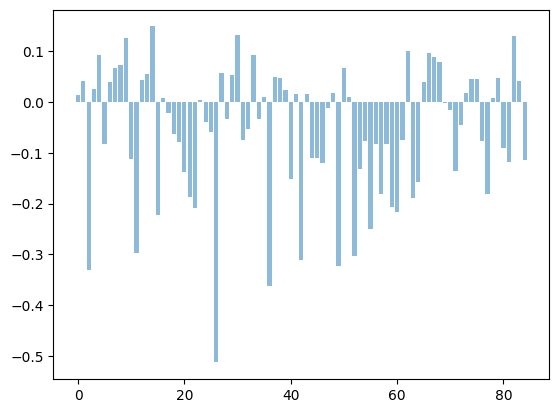

In [37]:
# Plot Weights
nfw = baseline_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))

plt.bar(y_pos, nfw, align='center', alpha=0.5)

### Regularized Model

In [38]:
l1_model = keras.Sequential([
    keras.layers.Dense(85, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(X_train_prep.shape[1],)),
    keras.layers.Dense(64, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(1, activation='sigmoid')

  ])

l1_model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


l2_model = keras.Sequential([
    keras.layers.Dense(85, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu,
                       input_shape=(X_train_prep.shape[1],)),
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(1, activation='sigmoid')
  ])

l2_model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
l1_history = l1_model.fit(X_train_prep, y_train, epochs=EPOCHS,
                    validation_data= (X_test_prep, y_test), verbose=0,
                    callbacks=[PrintDot()])
l2_history = l2_model.fit(X_train_prep, y_train, epochs=EPOCHS,
                    validation_data= (X_test_prep, y_test), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [40]:
# Evaluate the model on the test set
test_loss, test_accuracy = l1_model.evaluate(X_test_prep, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9439 - loss: 0.3128
Test Accuracy: 0.94


In [41]:
# Evaluate the model on the test set
test_loss, test_accuracy = l2_model.evaluate(X_test_prep, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9439 - loss: 0.2162
Test Accuracy: 0.94


In [42]:
# Print the lowest validation error
lowest_validation_error = min(l1_history.history['val_loss'])
print(f'Lowest Validation Error: {lowest_validation_error:.4f}')

Lowest Validation Error: 0.3201


In [43]:
# Print the lowest validation error
lowest_validation_error = min(l2_history.history['val_loss'])
print(f'Lowest Validation Error: {lowest_validation_error:.4f}')

Lowest Validation Error: 0.2256


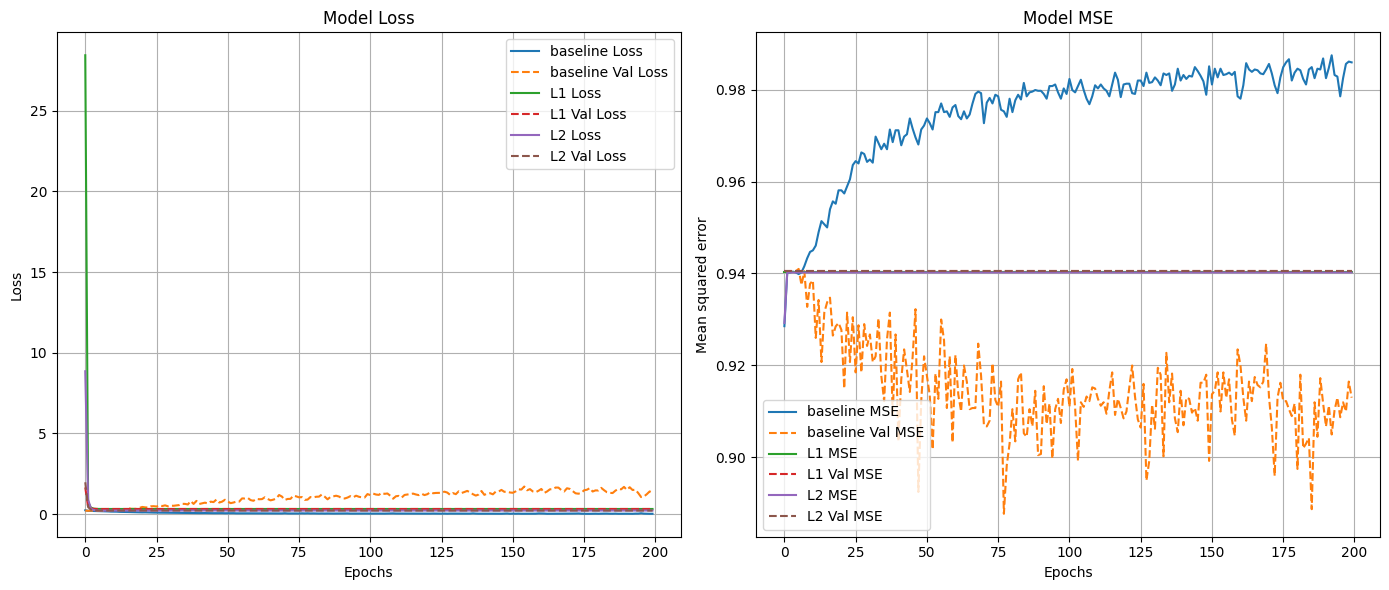

In [45]:
def plot_history(histories):
    plt.figure(figsize=(14, 6))

    # Plotting loss
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    for label, history in histories:
        plt.plot(history.history['loss'], label=f'{label} Loss')
        plt.plot(history.history['val_loss'], linestyle='--', label=f'{label} Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plotting accuracy
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    for label, history in histories:
        plt.plot(history.history['accuracy'], label=f'{label} MSE')
        plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{label} Val MSE')
    plt.title('Model MSE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean squared error')
    plt.legend()
    plt.grid()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Example usage
plot_history([('baseline', b_history),
               ('L1', l1_history),
               ('L2', l2_history)])

#Conclusion

*   The accuracy the model using a naïve approach: 0.93
*   The accuracy of the best model: 0.94 with both L1 and L2 regularization model

